This is a snippet from a project of my own(Julius) that i started to practice python on the first day.
I became sick wed/thursday the 8th and therefore it is not as thorough as i would've wanted, in terms of considerations

This project has the intent of making potential profit clear for myself while trading in the videogame Warframe. the API is from a third party, warframe.market.
Warframe.market acts as a trading hub, wherein users post trades. Other users will be able to click "buy", which give a string of text they can paste into the game to contact the seller.
 Users have accounts with account names.



In [1]:
#http requsts(get)
import requests
#data structure, pd
import pandas as pd
#hashing (usernames)
import hashlib
#visualization
import matplotlib.pyplot as plt
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
#name of the item seperately, space->underscore, payloadnames have underscore.
#Using "augur reach". Other examples: Pressure point, garuda prime set.
itemname=("augur reach")
item = itemname.replace(" ","_")
response = requests.get(f'https://api.warframe.market/v1/items/{item}/orders')

In [3]:
#if request succeed, data variable becomes json response content.
if response.status_code == 200:
    data = response.json()
    orders = data['payload']['orders']

In [4]:
#Making the dataframe
df = pd.DataFrame(orders)

In [5]:
#the warframe.market api is very nested, so one needs to dig deep to find the data needed.
df

,platinum,last_update,platform,visible,creation_date,quantity,user,order_type,id,mod_rank,region
0,30,2018-05-09T15:21:35.000+00:00,pc,True,2018-05-09T15:21:35.000+00:00,1,"{'reputation': 3, 'locale': 'en', 'avatar': No...",sell,5af311ffab37d3039432b91b,0,en
1,49,2024-01-27T22:56:06.000+00:00,pc,True,2018-10-02T01:17:49.000+00:00,1,"{'reputation': 96, 'locale': 'en', 'avatar': N...",sell,5bb2c73d0f436001fae50286,5,en
2,20,2024-02-03T02:33:54.000+00:00,pc,True,2018-10-21T23:07:49.000+00:00,2,"{'reputation': 5, 'locale': 'en', 'avatar': No...",sell,5bcd06c5814b4c0013b7c7b3,0,en
3,35,2019-02-26T09:19:15.000+00:00,pc,True,2019-02-26T09:19:15.000+00:00,1,"{'reputation': 6, 'locale': 'en', 'avatar': No...",sell,5c75049306864507b9966dab,5,en
4,100,2019-05-17T12:57:54.000+00:00,pc,True,2019-05-17T12:57:54.000+00:00,6,"{'reputation': 788, 'locale': 'en', 'avatar': ...",sell,5cdeafd2aa72901575366d6d,5,en
...,...,...,...,...,...,...,...,...,...,...,...
726,30,2024-02-11T12:49:54.000+00:00,pc,True,2024-02-11T12:49:54.000+00:00,7,"{'reputation': 1, 'locale': 'en', 'avatar': 'u...",sell,65c8c27250ebee022f8fb158,5,en
727,20,2024-02-11T13:20:38.000+00:00,pc,True,2024-02-11T13:20:38.000+00:00,1,"{'reputation': 0, 'locale': 'en', 'avatar': No...",sell,65c8c9a6fe113c0523450999,0,en
728,18,2024-02-11T13:22:06.000+00:00,pc,True,2024-02-11T13:22:06.000+00:00,3,"{'reputation': 4, 'locale': 'en', 'avatar': 'u...",sell,65c8c9feb0360b00b592da99,0,en
729,19,2024-02-11T13:27:17.000+00:00,pc,True,2024-02-11T13:27:17.000+00:00,1,"{'reputation': 1, 'locale': 'en', 'avatar': No...",sell,65c8cb35a6d41f0091b88016,0,en


In [6]:
#Data cleaning
#Warframe.market shows offline, ingame, online, sell / buy order, and platform. Cleaning to show relevant user trades.
df = df[(df['order_type'] == 'sell') & (df['platform'] == 'pc') & ((df['user'].apply(lambda x: x['status']) == 'online') | (df['user'].apply(lambda x: x['status']) == 'ingame'))]

In [7]:
#showing current data.
df.head()

,platinum,last_update,platform,visible,creation_date,quantity,user,order_type,id,mod_rank,region
1,49,2024-01-27T22:56:06.000+00:00,pc,True,2018-10-02T01:17:49.000+00:00,1,"{'reputation': 96, 'locale': 'en', 'avatar': N...",sell,5bb2c73d0f436001fae50286,5,en
4,100,2019-05-17T12:57:54.000+00:00,pc,True,2019-05-17T12:57:54.000+00:00,6,"{'reputation': 788, 'locale': 'en', 'avatar': ...",sell,5cdeafd2aa72901575366d6d,5,en
23,49,2023-04-28T04:54:33.000+00:00,pc,True,2022-05-15T09:07:06.000+00:00,30,"{'reputation': 1369, 'locale': 'en', 'avatar':...",sell,6280c2ba6dd0a001794d4c77,5,en
27,27,2023-05-28T11:58:08.000+00:00,pc,True,2022-07-10T00:44:33.000+00:00,3,"{'reputation': 195, 'locale': 'en', 'avatar': ...",sell,62ca20f1f2b8830091fe3046,5,en
47,80,2024-01-08T01:40:04.000+00:00,pc,True,2022-12-31T15:58:43.000+00:00,69,"{'reputation': 315, 'locale': 'en', 'avatar': ...",sell,63b05c33723943101737ba12,5,en


In [8]:
#Data exploration
df.isnull().sum()

platinum         0
last_update      0
platform         0
visible          0
creation_date    0
quantity         0
user             0
order_type       0
id               0
mod_rank         0
region           0
dtype: int64

In [9]:

df.count()

platinum         57
last_update      57
platform         57
visible          57
creation_date    57
quantity         57
user             57
order_type       57
id               57
mod_rank         57
region           57
dtype: int64

In [10]:
#cleaning last_update, removing timezone
df['last_update'] = pd.to_datetime(df['last_update']).dt.tz_localize(None)


C:\Users\AxiiS\AppData\Local\Temp\ipykernel_107644\4010300516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_update'] = pd.to_datetime(df['last_update']).dt.tz_localize(None)


In [11]:
#cleaning creation_date(removing time/timezone)
df['creation_date'] = pd.to_datetime(df['creation_date']).dt.date

C:\Users\AxiiS\AppData\Local\Temp\ipykernel_107644\1107873046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['creation_date'] = pd.to_datetime(df['creation_date']).dt.date


In [12]:
#removing everything but the ingame_name from the user column
df['user'] = df['user'].apply(lambda x: x['ingame_name'] if 'ingame_name' in x else None)

C:\Users\AxiiS\AppData\Local\Temp\ipykernel_107644\1711834775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['user'].apply(lambda x: x['ingame_name'] if 'ingame_name' in x else None)


In [13]:
#Droppingn a few columns
#id
df = df.drop(['id','order_type','region','visible'], axis=1)

If i were to use this program to trade, anonymization would be a very bad idea.
For the sake of storing said data to use for BI stuff, i would argue that even though it's usernames,
it should be done.

hashing or pseudonymizaiton seems to be the best practice for this case(usernames).

In [14]:
#using hashlib to scramble the names.
df['user'] = df['user'].apply(lambda name: hashlib.sha256(name.encode()).hexdigest())

In [15]:
df.head()

,platinum,last_update,platform,creation_date,quantity,user,mod_rank
1,49,2024-01-27 22:56:06,pc,2018-10-02,1,9ae580d2bffad3c87e9b41b31877510b70533c3290b94e...,5
4,100,2019-05-17 12:57:54,pc,2019-05-17,6,d3ccf63298746d348a38eb7a98b552b3e20e7ea6ff578d...,5
23,49,2023-04-28 04:54:33,pc,2022-05-15,30,5e4b9a84cc1930a0e8775a0eb5b7b4cba12cb16186af36...,5
27,27,2023-05-28 11:58:08,pc,2022-07-10,3,f5c219625793fe9afaa36cbe38c183b89c727051cab7ce...,5
47,80,2024-01-08 01:40:04,pc,2022-12-31,69,18e6ef9ecfc94b407d26e7a801b8bdeba0d7b68423e70c...,5


Data visualization

<Axes: ylabel='Frequency'>

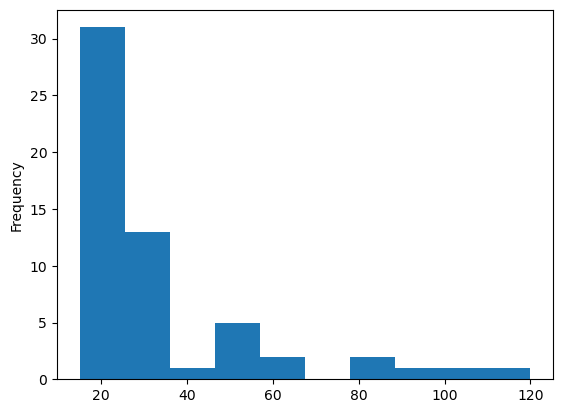

In [16]:
#using built in histogram.
#platinum = price
df.platinum.plot.hist()

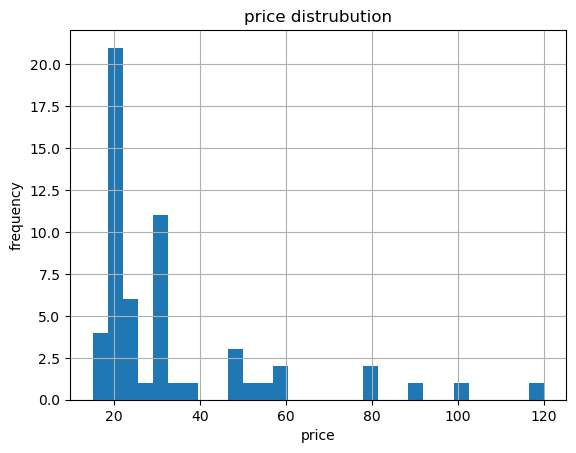

In [17]:
df['platinum'].hist(bins=30)
plt.title('price distrubution')
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

Very useful for this case: Time series plot

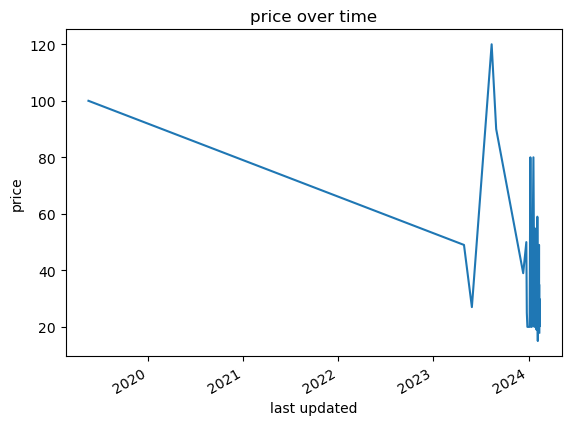

In [18]:
df.set_index('last_update')['platinum'].plot()
plt.title('price over time')
plt.xlabel('last updated')
plt.ylabel('price')
plt.show()

2023/2024 was a mess

In [19]:
#saving data to a CSV, using the name of the item. 
#df.to_csv(f'{item}.csv', index=False, sep='\t', encoding='utf-8')

In [21]:
#to excel file
df.to_excel(f'{item}_xlsx.xlsx',index = False)